In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
# pd.set_option("display.max_rows", None)

In [3]:
data = pd.read_csv("D:\programming\Machine Learning\محمدرضا مؤمنی/cardata.csv")
# data

In [4]:
df_cars = pd.DataFrame(data)
df_cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df_cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df_cars.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [8]:
df_cars.columns.to_list()

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
ستون سال ساخت خودرو را به ستون عمر خودرو تغییر می دهیم

In [9]:
Age = []
for year in df_cars["Year"]:
    year = df_cars["Year"].max() + 1 - year
    Age.append(year)

df_cars.insert(0, "Age", Age)

In [10]:
df_cars.drop(columns="Year", inplace=True)

In [11]:
df_cars

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,3,city,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,city,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,city,11.50,12.50,9000,Diesel,Dealer,Manual,0


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
برای پیدا کردن نویزها و میسینگ ولیوها نمودارها را رسم می نماییم

In [12]:
# به جهت صرفه جویی در زمان، تابعی تعریف می کنیم که نمودارها را با تنظیمات دلخواه ما رسم کند

def one_scatter(df_name, x_ax_name, y_ax_name):
    
    scatter_name = f"{y_ax_name}-{x_ax_name}"
    
    fig_output_name = scatter_name
    
#     plt.figure(figsize=(15,15), dpi=80)
    
    plt.title(f"{x_ax_name} - {y_ax_name}\n", fontsize=30 )
    
    scatter_name = plt.scatter(df_name[x_ax_name], df_name[y_ax_name])
    
    scatter_name.axes.tick_params(gridOn=True, size=12, labelsize=10)
    
    plt.xlabel(f"\n{x_ax_name}", fontsize=20)
    plt.ylabel(f"{y_ax_name}\n", fontsize=20)
    
    plt.xticks(rotation=90)


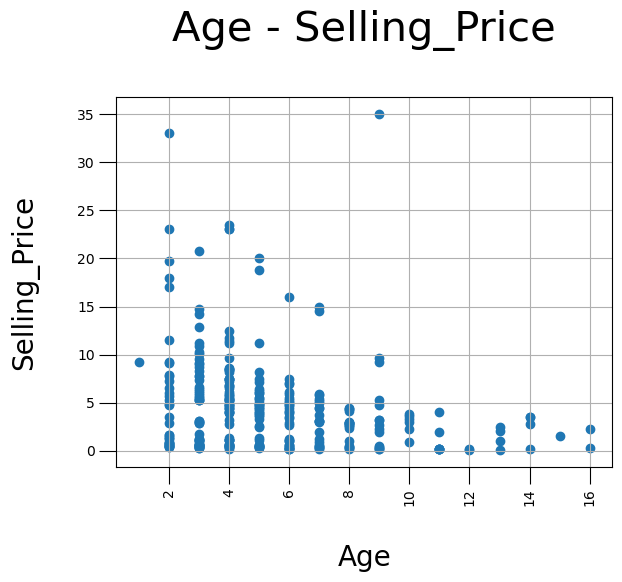

In [13]:
one_scatter(df_cars, df_cars.columns[0], df_cars.columns[2])

In [14]:
# یک داده پرت داریم
# Age = 9 در
# برای پیدا کردن آن دیتافریم را دوباره می چینیم
# بعداً مدلی می سازیم که این داده را نداشته باشد و این دو حالت را مقایسه می کنیم

In [15]:
df_cars.sort_values(by="Selling_Price", ascending=False)

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,9,land cruiser,35.00,92.60,78000,Diesel,Dealer,Manual,0
64,2,fortuner,33.00,36.23,6000,Diesel,Dealer,Automatic,0
63,4,fortuner,23.50,35.96,47000,Diesel,Dealer,Automatic,0
82,2,innova,23.00,25.39,15000,Diesel,Dealer,Automatic,0
51,4,fortuner,23.00,30.61,40000,Diesel,Dealer,Automatic,0
...,...,...,...,...,...,...,...,...,...
196,11,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0
197,9,Honda CB twister,0.16,0.51,33000,Petrol,Individual,Manual,0
198,8,Bajaj Discover 125,0.15,0.57,35000,Petrol,Individual,Manual,1
199,12,Honda CB Shine,0.12,0.58,53000,Petrol,Individual,Manual,0


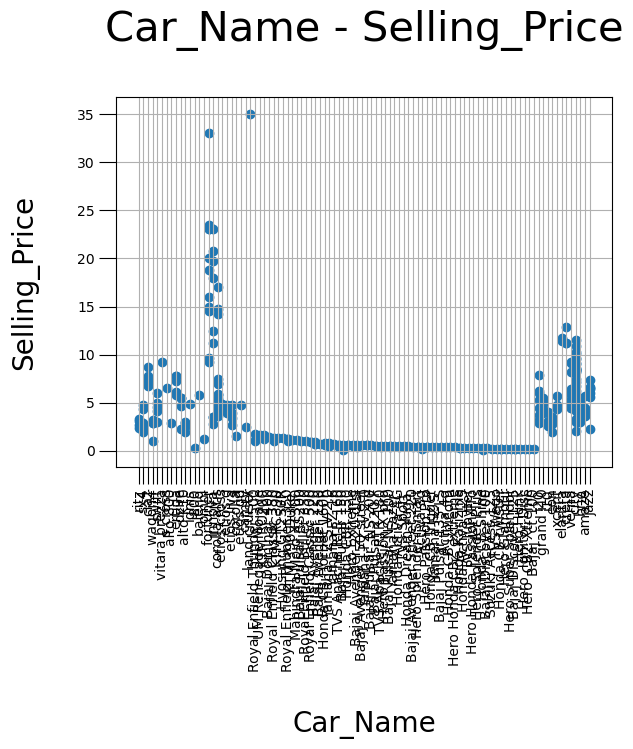

In [16]:
one_scatter(df_cars, df_cars.columns[1], df_cars.columns[2])

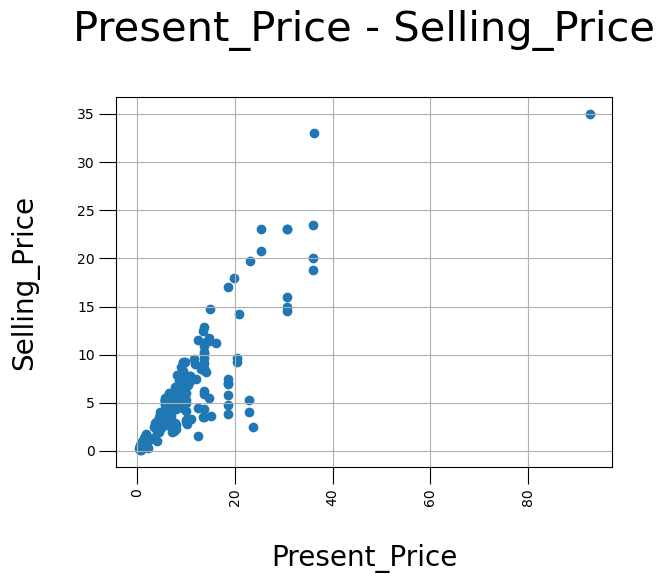

In [17]:
one_scatter(df_cars, df_cars.columns[3], df_cars.columns[2])

In [18]:
# یک داده پرت داریم
# Present_Price = 92.60
# برای پیدا کردن آن دیتافریم را دوباره می چینیم
# بعداً مدلی می سازیم که این داده را نداشته باشد و این دو حالت را مقایسه می کنیم

In [19]:
df_cars.sort_values(by="Present_Price", ascending=False)

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,9,land cruiser,35.00,92.60,78000,Diesel,Dealer,Manual,0
64,2,fortuner,33.00,36.23,6000,Diesel,Dealer,Automatic,0
59,5,fortuner,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,5,fortuner,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,4,fortuner,23.50,35.96,47000,Diesel,Dealer,Automatic,0
...,...,...,...,...,...,...,...,...,...
197,9,Honda CB twister,0.16,0.51,33000,Petrol,Individual,Manual,0
173,2,Activa 4g,0.40,0.51,1300,Petrol,Individual,Automatic,0
181,3,Hero Splender Plus,0.30,0.48,50000,Petrol,Individual,Manual,0
183,6,Bajaj Discover 100,0.27,0.47,21000,Petrol,Individual,Manual,0


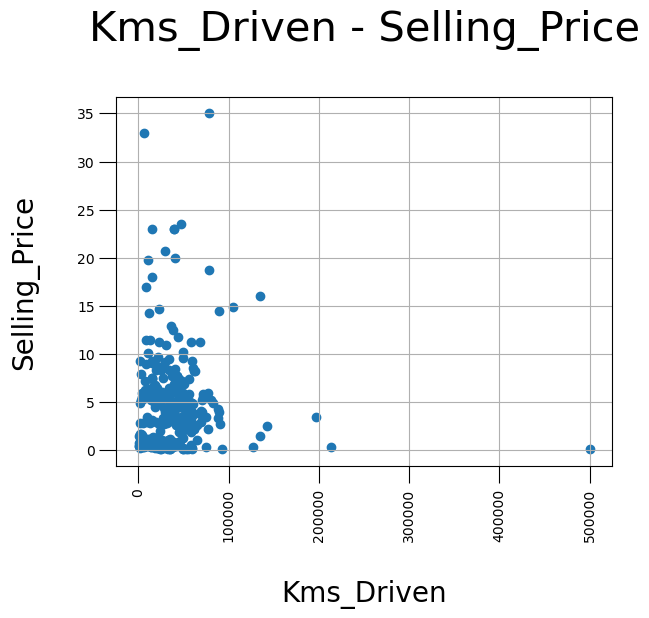

In [20]:
one_scatter(df_cars, df_cars.columns[4], df_cars.columns[2])

In [21]:
# یک داده پرت داریم
# Kms_Driven = 500,000
# برای پیدا کردن آن دیتافریم را دوباره می چینیم
# بعداً مدلی می سازیم که این داده را نداشته باشد و این دو حالت را مقایسه می کنیم

In [22]:
df_cars.sort_values(by="Kms_Driven", ascending=False)

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,11,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0
179,9,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0
84,14,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,13,camry,2.50,23.73,142000,Petrol,Individual,Automatic,3
77,15,corolla,1.50,12.35,135154,Petrol,Dealer,Automatic,0
...,...,...,...,...,...,...,...,...,...
126,2,Bajaj Avenger 220,0.90,0.95,1300,Petrol,Individual,Manual,0
103,2,Bajaj Dominar 400,1.45,1.60,1200,Petrol,Individual,Manual,0
166,3,Hero Passion Pro,0.45,0.55,1000,Petrol,Individual,Manual,0
165,3,Activa 3g,0.45,0.54,500,Petrol,Individual,Automatic,0


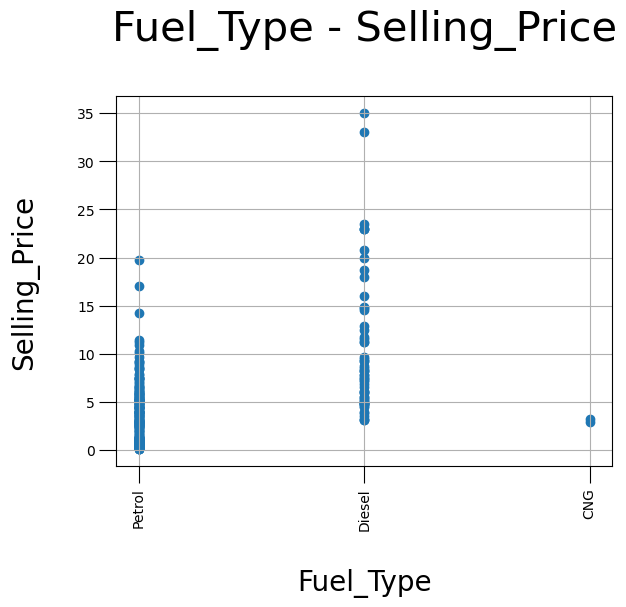

In [23]:
one_scatter(df_cars, df_cars.columns[5], df_cars.columns[2])

In [24]:
# تنها ۲ نمونه داده برای سوخت سی ان جی داریم

# می توانیم در آینده با توجه به تعداد کم آن ها در مقایسه با سایر سوخت ها، از آن ها صرف نظر کنیم و 
# مدلی بسازیم که فقط برای سوخت های بنزین و دیزل کاربرد داشته باشد

# ولی در حال حاضر و در تحلیل پیش رو آن را حذف نمی کنیم

In [25]:
df_cars.sort_values(by="Fuel_Type")

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
18,4,wagon r,3.25,5.09,35500,CNG,Dealer,Manual,0
35,8,sx4,2.95,7.74,49998,CNG,Dealer,Manual,0
201,9,i20,3.25,6.79,58000,Diesel,Dealer,Manual,1
74,5,etios cross,4.90,8.93,83000,Diesel,Dealer,Manual,0
211,4,elantra,11.75,14.79,43535,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
134,2,TVS Apache RTR 160,0.65,0.81,11800,Petrol,Individual,Manual,0
135,4,Bajaj Pulsar 150,0.65,0.74,5000,Petrol,Individual,Manual,0
136,5,Honda CBR 150,0.65,1.20,23500,Petrol,Individual,Manual,0
106,5,Hyosung GT250R,1.35,3.45,16500,Petrol,Individual,Manual,1


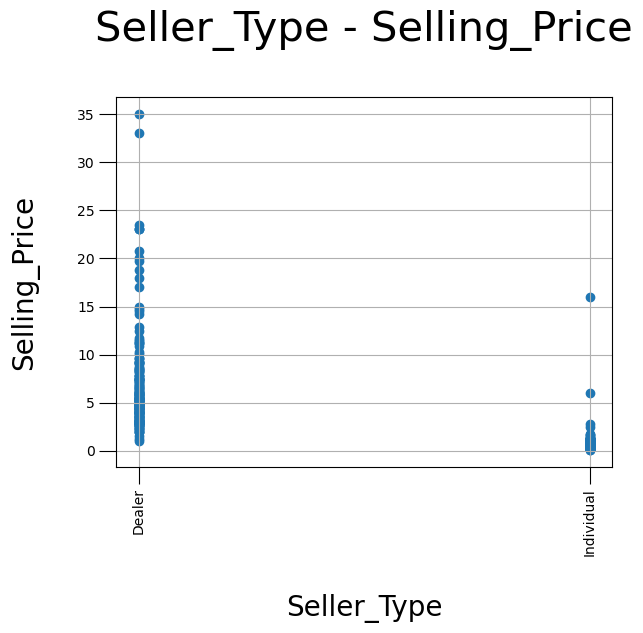

In [26]:
one_scatter(df_cars, df_cars.columns[6], df_cars.columns[2])

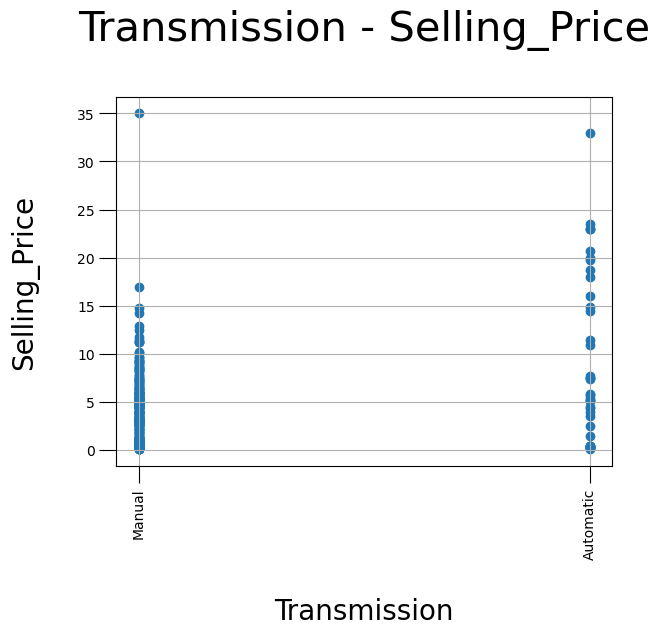

In [27]:
one_scatter(df_cars, df_cars.columns[7], df_cars.columns[2])

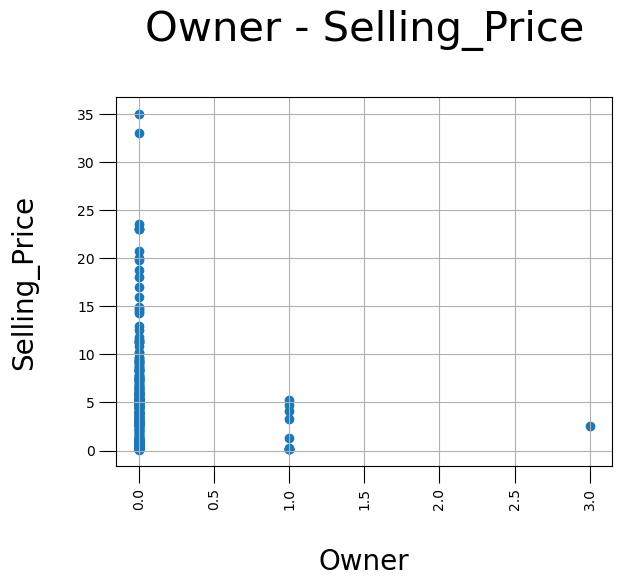

In [28]:
one_scatter(df_cars, df_cars.columns[8], df_cars.columns[2])

In [29]:
# به نظر می رسد که یک داده پرت داریم ولی با توجه به تعداد کم نمونه های فیچر (تنها سه نمونه داریم) آن را حذف نمی کنیم


In [30]:
df_cars.sort_values(by="Owner", ascending=False)

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,13,camry,2.50,23.73,142000,Petrol,Individual,Automatic,3
58,5,etios g,4.10,6.80,39485,Petrol,Dealer,Manual,1
241,4,xcent,4.75,7.13,35866,Petrol,Dealer,Manual,1
193,6,Hero Ignitor Disc,0.20,0.65,24000,Petrol,Individual,Manual,1
184,11,Bajaj Pulsar 150,0.25,0.75,26000,Petrol,Individual,Manual,1
...,...,...,...,...,...,...,...,...,...
101,2,UM Renegade Mojave,1.70,1.82,1400,Petrol,Individual,Manual,0
100,3,Royal Enfield Thunder 500,1.75,1.90,3000,Petrol,Individual,Manual,0
99,9,fortuner,9.65,20.45,50024,Diesel,Dealer,Manual,0
98,6,corolla altis,7.05,18.61,45000,Petrol,Dealer,Manual,0


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
گفته شد که در تحلیل به ستون نام خودرو نیازی نداریم


In [31]:
df = df_cars.drop(columns=["Car_Name"])
df

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
در ابتدا آموزش مدل را با وجود داده های پرت انجام می دهیم
و سپس آن را با حالت بدون داده های پرت مقایسه می کنیم

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
حل مسئله با روش get_dummies تا نتیجه آن را با one hot encoding مقایسه نماییم

In [32]:
df_dum = pd.get_dummies(df, columns=["Fuel_Type", "Seller_Type", "Transmission"], drop_first=True)
df_dum

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,0,1,0,0,1
297,4,4.00,5.90,60000,0,0,1,0,1
298,10,3.35,11.00,87934,0,0,1,0,1
299,2,11.50,12.50,9000,0,1,0,0,1


In [33]:
# مشخص کردن فیچرها و تارگت

In [34]:
X = df_dum.drop("Selling_Price", axis=1)
y = pd.DataFrame(df_dum, columns=["Selling_Price"])
y = y.values.reshape(-1, 1)

In [35]:
# تعیین داده های آموزش و تست

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
# ایجاد مدل

In [38]:
regressor_dum = LinearRegression()

In [39]:
# فیت کردن مدل بر روی داده های آموزش

In [40]:
regressor_dum.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regressor_dum.predict(X_test)

In [42]:
##################################################################################

In [43]:
# را در دیتافریم فیچرها وارد می کنیم تا بتوانیم (y_pred) و تارگت پیش بینی شده (y_test) داده های تارگت تست
# نمودار رسم کنیم و ببینیم از روی نمودار می توان به نتایجی دست یافت یا نه؟

In [44]:
# X_test
X_test.shape

(61, 8)

In [45]:
X_test.insert(8, "y_test", y_test)
X_test.insert(9, "y_pred", y_pred)
X_test

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,y_test,y_pred
223,4,9.400,61381,0,1,0,0,1,8.25,7.517500
150,8,0.826,6000,0,0,1,1,1,0.50,-0.381360
226,4,5.700,24678,0,0,1,0,1,5.25,4.255947
296,3,11.600,33988,0,1,0,0,1,9.50,9.007192
52,2,19.770,15000,0,1,0,0,0,18.00,14.426934
...,...,...,...,...,...,...,...,...,...,...
137,6,0.787,16000,0,0,1,1,1,0.65,0.306821
227,8,4.430,57000,0,0,1,0,1,2.55,1.983211
26,6,5.870,55138,0,0,1,0,1,4.15,3.375038
106,5,3.450,16500,1,0,1,1,1,1.35,0.879015


In [46]:
df_2 = X_test.sort_values(by="Age", ascending=True)
# df2

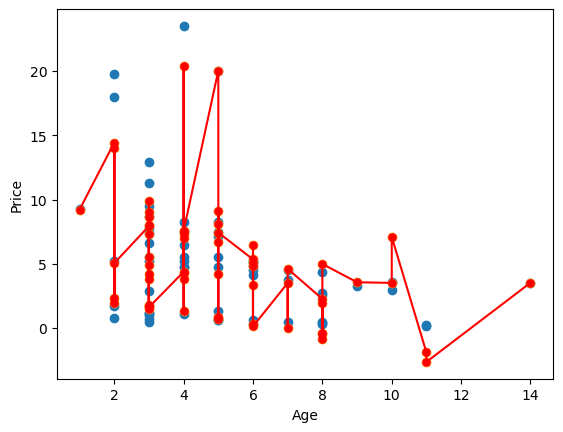

In [47]:
a = df_2.Age
b = df_2.y_test
c = df_2.Age
d = df_2.y_pred
plt.xlabel("Age")
plt.ylabel("Price")
plt.scatter(a, b)
plt.scatter(c, d)
plt.plot(c, d, color="red", marker="o", ms=5)
plt.show()

Text(0, 0.5, 'Prediction')

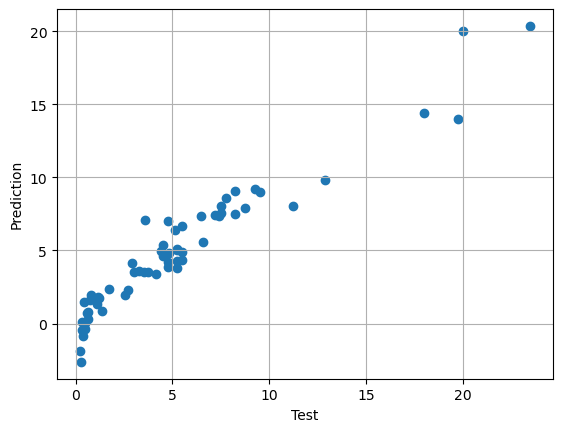

In [48]:
# بر حسب یکدیگر y رسم نمودارهای

plt.scatter(y_test, y_pred)
plt.grid()
plt.xlabel("Test")
plt.ylabel("Prediction")


In [49]:
# دستور زیر را برای این می نویسیم که تارگت های حقیقی و پیش بینی شده را کنار هم ببینیم برای مقایسه ابتدایی

In [50]:
Compare = pd.DataFrame({"Actual": y_test.flatten(), "Predict": y_pred.flatten()})
Compare

,Actual,Predict
0,8.25,7.517500
1,0.50,-0.381360
2,5.25,4.255947
3,9.50,9.007192
4,18.00,14.426934
...,...,...
56,0.65,0.306821
57,2.55,1.983211
58,4.15,3.375038
59,1.35,0.879015


In [51]:
# در پیش بینی قیمت عدد منفی داریم! چرا؟

In [52]:
##################################################################################

In [53]:
# عرض از مبدأ و ضرایب معادله رگرشن

In [54]:
print(regressor_dum.intercept_)
print(regressor_dum.coef_)

[4.36117572]
[[-3.83128077e-01  4.26479292e-01 -6.14426907e-06 -9.43575596e-01
   2.49268277e+00  5.83590556e-01 -1.14089738e+00 -1.43561056e+00]]


In [55]:
# چون داده ها نرمال سازی نشده اند امکان تحلیل ضرایب معادله رگرشن را نداریم
# در انتهای برنامه داده ها را نرمال سازی می کنیم و ضرایب معادله رگرشن را تحلیل می کنیم

In [56]:
# محاسبه متریک ها در این دیتاست

In [57]:
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.9937753386731603
Mean Squared Error (MSE): 2.1628715277880515
Root Mean Squared Error (RMSE): 1.4706704347976984
R2 Score: 0.9144342972228338


In [58]:
# داده ای که نیاز به پیش بینی دارد

In [59]:
df_sample = pd.DataFrame({"Age": 10,
                        "Kms_Driven": 42000,
                        "Fuel_Type_Diesel": 0,
                        "Transmission_Manual": 1,
                        "Seller_Type_Individual": 0,
                        "Owner": 1,
                        "Present_Price": [11.23],
                        "Fuel_Type_Petrol": 1,
                        "Selling_Price": 99})
df_sample

,Age,Kms_Driven,Fuel_Type_Diesel,Transmission_Manual,Seller_Type_Individual,Owner,Present_Price,Fuel_Type_Petrol,Selling_Price
0,10,42000,0,1,0,1,11.23,1,99


In [60]:
# با انجام دستورات سلول زیر
# مطابق دیتافریم اصلی می شود df_sample اولاً ترتیب چینش ستون های
# های آموزش و پردیکت را تعریف کنیم y ها و X ثانیاً به راحتی در سلول بعد از آن می توانیم


In [61]:
# df4 = pd.concat([df_dum, df_sample], axis=0)
df4 = pd.concat([df_dum, df_sample])
df_sample = df4.iloc[df.shape[0]:]
df_sample

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,10,99.0,11.23,42000,1,0,1,0,1


In [62]:
# در توضیح دستورات سلول بالا:
# یک تاپل برمی گرداند که دو عضو دارد و اولی تعداد سطر و دومی تعداد ستون دیتافریم است shape می دانیم که دستور
# از این دستور برای مشخص کردن موقعیت داده های نمونه مورد پیش بینی در دیتافریم فوق استفاده می کنیم

In [63]:
# حال داده های آموزش را از کل دیتافریم انتخاب می کنیم و داده تست را هم از داده های جدیدی که صورت سؤال داده است

In [64]:
X_train = df_dum.drop("Selling_Price", axis=1)
y_train = pd.DataFrame(df_dum, columns=["Selling_Price"]).values.reshape(-1, 1)
X_test = df_sample.drop("Selling_Price", axis=1)

In [65]:
# مدل را با دیتاست اصلی آموزش می دهیم

In [66]:
regressor_dum.fit(X_train, y_train)
y_pred_dummies_outliers = regressor_dum.predict(X_test)

In [67]:
# نتیجه پیش بینی مدل بر روی داده جدید

In [68]:
print("قیمت پیش بینی شده:")
print(float(y_pred_dummies_outliers))

قیمت پیش بینی شده:
3.5713951428853417


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
حل مسئله با روش one hot encoding با وجود داده های پرت یا همون outlier

In [69]:
df

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [70]:
onehot = OneHotEncoder(sparse=False, drop="first")

In [71]:
columns_to_encode = ["Fuel_Type", "Seller_Type", "Transmission"]

In [72]:
X_onehot = onehot.fit_transform(df[columns_to_encode])
X_onehot

array([[0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.]])

In [73]:
onehot.categories_

[array(['CNG', 'Diesel', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object)]

In [74]:
# دو راه داریم برای به دست آوردن نام جدید ستون های انکد شده
# while راه ۱: با نوشتن حلقه
# راه ۲: با دستوری در کتابخانه سایکیت لرن

# از راه ۲ پیش می رویم

In [75]:
# راه ۱

In [76]:
# columns_encoded = []
# category_list = []

# j = 0
# while j < len(onehot.categories_):
#     k = 0
#     while k < len(onehot.categories_[j]):
#         category_list.append(onehot.categories_[j][k])
#         column_name = f"{columns_to_encode[j]}_{onehot.categories_[j][k]}"
#         columns_encoded.append(column_name)
#         k += 1
#     j += 1
    
    
# print("category_list:", category_list)
# print()
# print("columns:", columns_encoded)

In [77]:
# راه ۲

In [78]:
columns_encoded = onehot.get_feature_names_out()
# columns_encoded = onehot.get_feature_names_out(onehot.feature_names_in_)
columns_encoded

array(['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'], dtype=object)

In [79]:
# در ادامه فیچرهای انکد شده را به دیتافریم اصلی اضافه می کنیم

In [80]:
df_X = pd.DataFrame(X_onehot, columns=columns_encoded)
df_onehot = pd.concat([df, df_X], axis=1)
df_onehot = df_onehot.drop(columns_to_encode, axis=1) 
df_onehot

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0.0,1.0,0.0,1.0
1,6,4.75,9.54,43000,0,1.0,0.0,0.0,1.0
2,2,7.25,9.85,6900,0,0.0,1.0,0.0,1.0
3,8,2.85,4.15,5200,0,0.0,1.0,0.0,1.0
4,5,4.60,6.87,42450,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,0,1.0,0.0,0.0,1.0
297,4,4.00,5.90,60000,0,0.0,1.0,0.0,1.0
298,10,3.35,11.00,87934,0,0.0,1.0,0.0,1.0
299,2,11.50,12.50,9000,0,1.0,0.0,0.0,1.0


In [81]:
# فیچرها و تارگت را مشخص می نماییم

In [82]:
X = df_onehot.drop("Selling_Price", axis=1)
y = pd.DataFrame(df_onehot, columns=["Selling_Price"])
y = y.values.reshape(-1, 1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
regressor_onehot_1 = LinearRegression()

In [85]:
regressor_onehot_1.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = regressor_onehot_1.predict(X_test)

In [87]:
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

score_onehot_outliers = metrics.r2_score(y_test, y_pred)

Mean Absolute Error (MAE): 0.9937753386731603
Mean Squared Error (MSE): 2.1628715277880515
Root Mean Squared Error (RMSE): 1.4706704347976984
R2 Score: 0.9144342972228338


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
    در این جا cross validation نیز انجام می‌دهیم تا ببینیم دقت آن تا چه حد به دقت مدل نزدیک است.

In [88]:
model = LinearRegression()

kfold_val = KFold(5, shuffle=True, random_state=0)

results = cross_val_score(model, X, y, cv=kfold_val)

print(results)
print(np.mean(results))

A = np.mean(results)
A

[0.9144343  0.79951689 0.8705894  0.79430099 0.87435594]
0.850639504526703


0.850639504526703

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
    داده‌ها را نرمال سازی می‌کنیم تا بتوانیم ضرایب معادله رگرشن را تفسیر نماییم.

In [89]:
# Standard Scaling

In [90]:
Scaler = StandardScaler()
X_train_scaling = Scaler.fit_transform(X_train)
X_test_scaling = Scaler.transform(X_test)

In [91]:
regressor_onehot_1.fit(X_train_scaling, y_train)
y_pred_onehot_outliers = regressor_onehot_1.predict(X_test_scaling)

In [92]:
print(y_pred_onehot_outliers)

[[ 7.51749959]
 [-0.38136   ]
 [ 4.2559471 ]
 [ 9.00719207]
 [14.4269339 ]
 [ 4.87144495]
 [ 3.50800415]
 [ 1.44729345]
 [ 5.3451756 ]
 [ 4.61435641]
 [ 2.26758534]
 [ 1.6209573 ]
 [ 5.0502457 ]
 [ 7.5592941 ]
 [ 8.60637169]
 [13.98391877]
 [ 7.32792948]
 [ 4.23074458]
 [-0.43329109]
 [ 2.36959252]
 [ 4.98862734]
 [ 3.82566592]
 [ 6.43249291]
 [ 8.02059313]
 [-1.89494718]
 [ 1.92952344]
 [-0.82194725]
 [ 0.82000278]
 [ 0.0287008 ]
 [ 7.09763522]
 [ 3.56594643]
 [ 7.42982762]
 [ 0.72122573]
 [ 7.93570184]
 [ 3.51526022]
 [ 1.8051379 ]
 [ 5.54534144]
 [ 6.9878273 ]
 [-2.62961763]
 [ 9.08622868]
 [ 9.21468651]
 [20.02249841]
 [ 4.37997532]
 [ 3.85349481]
 [ 6.66353853]
 [ 9.8481939 ]
 [ 0.13251979]
 [ 1.68098927]
 [ 5.0992548 ]
 [ 7.35232556]
 [ 8.07177253]
 [ 4.17227139]
 [ 4.84915569]
 [20.36876087]
 [ 1.7479962 ]
 [ 1.30291959]
 [ 0.30682078]
 [ 1.98321103]
 [ 3.37503799]
 [ 0.87901548]
 [ 3.52730876]]


In [93]:
print(regressor_onehot_1.intercept_)
print(regressor_onehot_1.coef_)

[4.52025]
[[-1.12869355  3.8218938  -0.25837107 -0.22571429  0.97292493  0.23159256
  -0.5484546  -0.46791356]]


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
ضرایبی که بزرگ‌تر از ۱ هستند تأثیر بیش‌تری در دقت پیش‌بینی مدل دارند.

In [94]:
# داده ای که نیاز به پیش بینی دارد

In [95]:
df_sample = pd.DataFrame({"Age": 10,
                    "Kms_Driven": 42000,
                    "Fuel_Type_Diesel": 0,
                    "Transmission_Manual": 1,
                    "Seller_Type_Individual": 0,
                    "Owner": 1,
                    "Present_Price": [11.23],
                    "Selling_Price": 99,
                    "Fuel_Type_Petrol": 1,
                   })
df_sample

,Age,Kms_Driven,Fuel_Type_Diesel,Transmission_Manual,Seller_Type_Individual,Owner,Present_Price,Selling_Price,Fuel_Type_Petrol
0,10,42000,0,1,0,1,11.23,99,1


In [96]:
df4 = pd.concat([df_onehot, df_sample])
df_sample = df4.iloc[df4.shape[0]-1:]
df_sample

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,10,99.0,11.23,42000,1,0.0,1.0,0.0,1.0


In [97]:
X_train = df_onehot.drop("Selling_Price", axis=1)
y_train = pd.DataFrame(df_onehot, columns=["Selling_Price"]).values.reshape(-1, 1)
X_test = df_sample.drop("Selling_Price", axis=1)

In [98]:
regressor_onehot_1.fit(X_train, y_train)
y_pred_onehot_outliers = regressor_onehot_1.predict(X_test)

In [99]:
print("قیمت پیش بینی شده:")
print(float(y_pred_onehot_outliers))

قیمت پیش بینی شده:
3.5713951428853417


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
حل مسئله با روش ordinal encoding با وجود داده های پرت یا همون outlier

In [100]:
df

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [101]:
orde = OrdinalEncoder()

In [102]:
columns_to_encode = ["Fuel_Type", "Seller_Type", "Transmission"]

In [103]:
X_ordinal = orde.fit_transform(df[columns_to_encode])
X_ordinal

array([[2., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 0

In [104]:
X_ordinal.shape

(301, 3)

In [105]:
orde.categories_

[array(['CNG', 'Diesel', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object)]

In [106]:
# با دستور زیر متوجه می شویم که به هر کتگوری چه عددی نسبت داده شده است

orde.inverse_transform([[0, 0, 0], [1, 1, 1], [2, 1, 1]])

array([['CNG', 'Dealer', 'Automatic'],
       ['Diesel', 'Individual', 'Manual'],
       ['Petrol', 'Individual', 'Manual']], dtype=object)

In [107]:
df_ord = df.copy()
df_X = pd.DataFrame(X_ordinal, columns=columns_to_encode)

df_ord[columns_to_encode] = df_X[columns_to_encode]
# df_ord[columns_to_encode] = df_X[columns_to_encode].values

df_ord

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,2.0,0.0,1.0,0
1,6,4.75,9.54,43000,1.0,0.0,1.0,0
2,2,7.25,9.85,6900,2.0,0.0,1.0,0
3,8,2.85,4.15,5200,2.0,0.0,1.0,0
4,5,4.60,6.87,42450,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,1.0,0.0,1.0,0
297,4,4.00,5.90,60000,2.0,0.0,1.0,0
298,10,3.35,11.00,87934,2.0,0.0,1.0,0
299,2,11.50,12.50,9000,1.0,0.0,1.0,0


In [108]:
X = df_ord.drop("Selling_Price", axis=1)
y = pd.DataFrame(df_ord, columns=["Selling_Price"])
y = y.values.reshape(-1, 1)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [110]:
regressor_ord_1 = LinearRegression()

In [111]:
regressor_ord_1.fit(X_train, y_train)

LinearRegression()

In [112]:
y_pred = regressor_ord_1.predict(X_test)

In [113]:
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

score_ordinal_outliers = metrics.r2_score(y_test, y_pred)

Mean Absolute Error (MAE): 1.0000326012147736
Mean Squared Error (MSE): 2.1885564456585143
Root Mean Squared Error (RMSE): 1.4793770464822396
R2 Score: 0.9134181721224179


In [114]:
model = LinearRegression()

kfold_val = KFold(5, shuffle=True, random_state=0)

results = cross_val_score(model, X, y, cv=kfold_val)

print(results)
print(np.mean(results))
B = np.mean(results)
B

[0.91341817 0.78959904 0.8623667  0.78205471 0.88024772]
0.8455372665709635


0.8455372665709635

In [115]:
df_sample = pd.DataFrame({"Age": 10,
                    "Kms_Driven": 42000,
                    "Transmission": 1,
                    "Owner": 1,
                    "Present_Price": [11.23],
                    "Fuel_Type": 2,
                    "Seller_Type": 0,
                    "Selling_Price": 99})
df_sample

,Age,Kms_Driven,Transmission,Owner,Present_Price,Fuel_Type,Seller_Type,Selling_Price
0,10,42000,1,1,11.23,2,0,99


In [116]:
df4 = pd.concat([df_ord, df_sample])
df_sample = df4.iloc[df4.shape[0]-1:]
df_sample

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,99.0,11.23,42000,2.0,0.0,1.0,1


In [117]:
X_train = df_ord.drop("Selling_Price", axis=1)
y_train = pd.DataFrame(df_ord, columns=["Selling_Price"]).values.reshape(-1, 1)
X_test = df_sample.drop("Selling_Price", axis=1)

In [118]:
regressor_ord_1.fit(X_train, y_train)
y_pred_ordinal_outliers = regressor_ord_1.predict(X_test)

In [119]:
print("قیمت پیش بینی شده:")
print(float(y_pred_ordinal_outliers))

قیمت پیش بینی شده:
3.595864360776483


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
در مرحله بعد داده های پرت را حذف می کنیم و دوباره مدل سازی می کنیم و دقت را می سنجیم

In [120]:
df_cars_2 = df_cars[df_cars["Present_Price"]<80]
df_cars_2 = df_cars_2[df_cars_2["Kms_Driven"]<400000]
# df_cars_2 = df_cars_2[df_cars_2["Owner"]<3.0]

df_cars_2.reset_index(drop=True, inplace=True)

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
نمودارهای دارای داده پرت را قبل و بعد از حذف داده های پرت رسم می کنیم که بفهمیم چه تغییری کرده اند

In [121]:
def plt_subplot(column_number_1, column_number_2):
    
    plt.subplot(1, 2, 1)
    one_scatter(df_cars, df_cars.columns[column_number_1], df_cars.columns[column_number_2])
    plt.title(f"{df_cars.columns[column_number_1]} - {df_cars.columns[column_number_2]} \n\nbefore\n", fontsize=20)

    plt.subplot(1, 2, 2)
    one_scatter(df_cars_2, df_cars_2.columns[column_number_1], df_cars_2.columns[column_number_2])
    plt.title(f"{df_cars.columns[column_number_1]} - {df_cars.columns[column_number_2]} \n\nafter\n", fontsize=20)

    plt.tight_layout()

    plt.subplots_adjust(right=1.4)

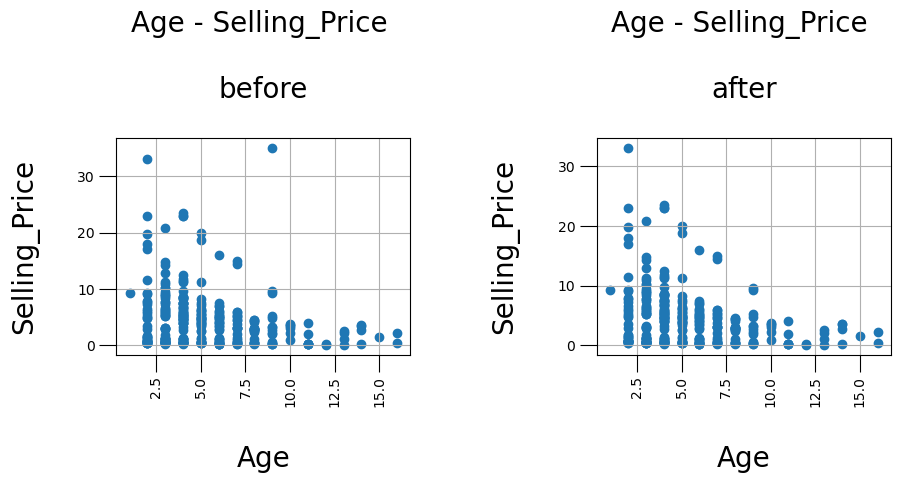

In [122]:
plt_subplot(0, 2)

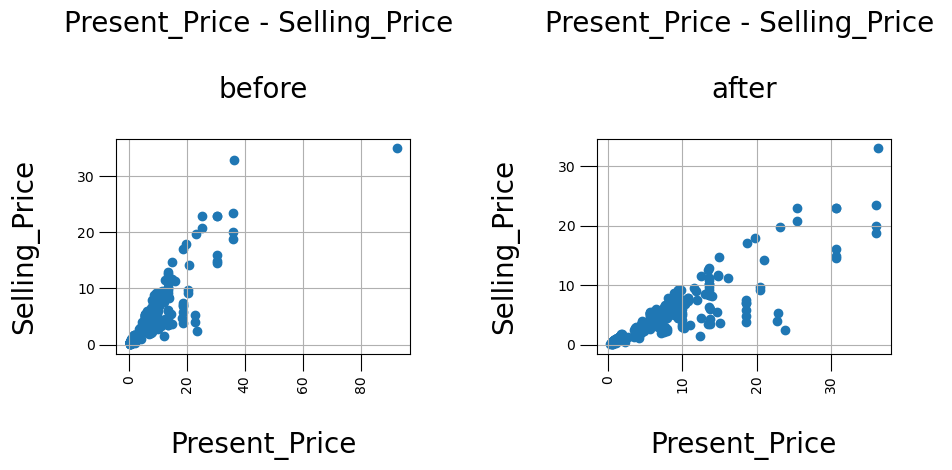

In [123]:
plt_subplot(3, 2)

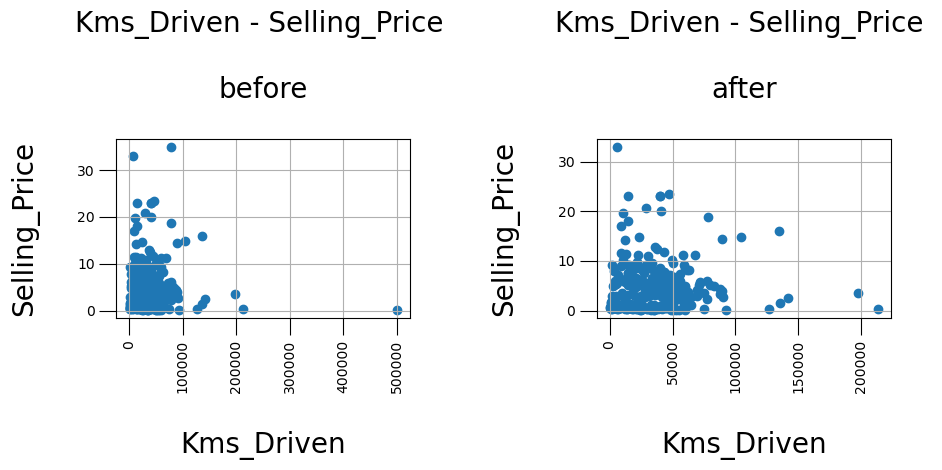

In [124]:
plt_subplot(4, 2)

In [125]:
# حذف ستون نام خودرو

df2 = df_cars_2.drop(columns=["Car_Name"])
df2.shape

(299, 8)

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
حالت اول

OneHotEncoding

In [126]:
onehot = OneHotEncoder(sparse=False, drop="first")

In [127]:
columns_to_encode = ["Fuel_Type", "Seller_Type", "Transmission"]

In [128]:
X_onehot = onehot.fit_transform(df2[columns_to_encode])
X_onehot

array([[0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.]])

In [129]:
onehot.feature_names_in_

array(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype=object)

In [130]:
onehot.n_features_in_

3

In [131]:
onehot.categories_

[array(['CNG', 'Diesel', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object)]

In [132]:
columns_encoded = onehot.get_feature_names_out()
# columns_encoded = onehot.get_feature_names_out(onehot.feature_names_in_)

columns_encoded

array(['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'], dtype=object)

In [133]:
df_X = pd.DataFrame(X_onehot, columns=columns_encoded)
df_onehot = pd.concat([df2, df_X], axis=1)
df_onehot = df_onehot.drop(columns_to_encode, axis=1) 
df_onehot


,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0.0,1.0,0.0,1.0
1,6,4.75,9.54,43000,0,1.0,0.0,0.0,1.0
2,2,7.25,9.85,6900,0,0.0,1.0,0.0,1.0
3,8,2.85,4.15,5200,0,0.0,1.0,0.0,1.0
4,5,4.60,6.87,42450,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
294,3,9.50,11.60,33988,0,1.0,0.0,0.0,1.0
295,4,4.00,5.90,60000,0,0.0,1.0,0.0,1.0
296,10,3.35,11.00,87934,0,0.0,1.0,0.0,1.0
297,2,11.50,12.50,9000,0,1.0,0.0,0.0,1.0


In [134]:
X = df_onehot.drop("Selling_Price", axis=1)
y = pd.DataFrame(df_onehot, columns=["Selling_Price"])
y = y.values.reshape(-1, 1)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [136]:
regressor_onehot_2 = LinearRegression()

In [137]:
regressor_onehot_2.fit(X_train, y_train)

LinearRegression()

In [138]:
y_pred = regressor_onehot_2.predict(X_test)

In [139]:
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

score_onehot_clean_data = metrics.r2_score(y_test, y_pred)

Mean Absolute Error (MAE): 1.2715444492135421
Mean Squared Error (MSE): 4.406055471023803
Root Mean Squared Error (RMSE): 2.099060616329077
R2 Score: 0.8844067874891178


In [140]:
model = LinearRegression()

kfold_val = KFold(5, shuffle=True, random_state=0)

results = cross_val_score(model, X, y, cv=kfold_val)

print(results)
print(np.mean(results))
C = np.mean(results)
C

[0.88440679 0.86758468 0.91046622 0.75189778 0.85723045]
0.8543171859005085


0.8543171859005085

In [141]:
df_sample = pd.DataFrame({"Age": 10,
                    "Kms_Driven": 42000,
                    "Fuel_Type_Diesel": 0,
                    "Transmission_Manual": 1,
                    "Seller_Type_Individual": 0,
                    "Owner": 1,
                    "Present_Price": [11.23],
                    "Fuel_Type_Petrol": 1,
                    "Selling_Price": 99})
df_sample

,Age,Kms_Driven,Fuel_Type_Diesel,Transmission_Manual,Seller_Type_Individual,Owner,Present_Price,Fuel_Type_Petrol,Selling_Price
0,10,42000,0,1,0,1,11.23,1,99


In [142]:
df4 = pd.concat([df_onehot, df_sample])
df_sample = df4.iloc[df4.shape[0]-1:]
df_sample

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,10,99.0,11.23,42000,1,0.0,1.0,0.0,1.0


In [143]:
X_train = df_onehot.drop("Selling_Price", axis=1)
y_train = pd.DataFrame(df_onehot, columns=["Selling_Price"]).values.reshape(-1, 1)
X_test = df_sample.drop("Selling_Price", axis=1)

In [144]:
regressor_onehot_2.fit(X_train, y_train)
y_pred_onehot_clean_data = regressor_onehot_2.predict(X_test)

In [145]:
print(y_pred_onehot_clean_data)

[[4.26452437]]


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
حالت دوم

OrdinalEncoding

In [146]:
df2

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
294,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
295,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
296,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
297,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [147]:
orde = OrdinalEncoder()

In [148]:
columns_to_encode = ["Fuel_Type", "Seller_Type", "Transmission"]

In [149]:
X_ordinal = orde.fit_transform(df2[columns_to_encode])
X_ordinal

array([[2., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       [2., 0., 1.],
       [2., 0., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 0., 1.],
       [1., 0., 1.],
       [2., 0., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 0

In [150]:
X_ordinal.shape

(299, 3)

In [151]:
orde.categories_

[array(['CNG', 'Diesel', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object)]

In [152]:
orde.inverse_transform([[0, 0, 0], [1, 1, 1], [2, 1, 1]])
# orde.inverse_transform([orde.categories_[0]])

array([['CNG', 'Dealer', 'Automatic'],
       ['Diesel', 'Individual', 'Manual'],
       ['Petrol', 'Individual', 'Manual']], dtype=object)

In [153]:
df_ord = df2.copy()
df_X = pd.DataFrame(X_ordinal, columns=columns_to_encode)

df_ord[columns_to_encode] = df_X[columns_to_encode]
# df_ordd[columns_to_encode] = df_X[columns_to_encode].values

df_ord

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,2.0,0.0,1.0,0
1,6,4.75,9.54,43000,1.0,0.0,1.0,0
2,2,7.25,9.85,6900,2.0,0.0,1.0,0
3,8,2.85,4.15,5200,2.0,0.0,1.0,0
4,5,4.60,6.87,42450,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
294,3,9.50,11.60,33988,1.0,0.0,1.0,0
295,4,4.00,5.90,60000,2.0,0.0,1.0,0
296,10,3.35,11.00,87934,2.0,0.0,1.0,0
297,2,11.50,12.50,9000,1.0,0.0,1.0,0


In [154]:
X = df_ord.drop("Selling_Price", axis=1)
y = pd.DataFrame(df_ord, columns=["Selling_Price"])
y = y.values.reshape(-1, 1)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [156]:
regressor_ord_2 = LinearRegression()

In [157]:
regressor_ord_2.fit(X_train, y_train)

LinearRegression()

In [158]:
y_pred = regressor_ord_2.predict(X_test)

In [159]:
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

score_ordinal_clean_data =  metrics.r2_score(y_test, y_pred)

Mean Absolute Error (MAE): 1.2642087468544474
Mean Squared Error (MSE): 4.418394329682106
Root Mean Squared Error (RMSE): 2.1019976997328293
R2 Score: 0.8840830765598273


In [160]:
model = LinearRegression()

kfold_val = KFold(5, shuffle=True, random_state=0)

results = cross_val_score(model, X, y, cv=kfold_val)

print(results)
print(np.mean(results))
D = np.mean(results)
D

[0.88408308 0.8556666  0.9141715  0.73858257 0.85946722]
0.8503941925827281


0.8503941925827281

In [161]:
df_sample = pd.DataFrame({"Age": 10,
                        "Kms_Driven": 42000,
                        "Transmission": 1,
                        "Owner": 1,
                        "Present_Price": [11.23],
                        "Fuel_Type": 2,
                        "Seller_Type": 0,
                        "Selling_Price": 99
                         })
df_sample

,Age,Kms_Driven,Transmission,Owner,Present_Price,Fuel_Type,Seller_Type,Selling_Price
0,10,42000,1,1,11.23,2,0,99


In [162]:
df4 = pd.concat([df_ord, df_sample])
df_sample = df4.iloc[df4.shape[0]-1:]
df_sample

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,99.0,11.23,42000,2.0,0.0,1.0,1


In [163]:
X_train = df_ord.drop("Selling_Price", axis=1)
y_train = pd.DataFrame(df_ord, columns=["Selling_Price"]).values.reshape(-1, 1)
X_test = df_sample.drop("Selling_Price", axis=1)

In [164]:
regressor_ord_2.fit(X_train, y_train)
y_pred_ordinal_clean_data = regressor_ord_2.predict(X_test)

In [165]:
print(y_pred_ordinal_clean_data)

[[4.2782355]]


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
مقایسه تمامی قیمت های پیش بینی شده


In [166]:
print("پیش از حذف داده‌های پرت")
print("y_pred_onehot_outliers:", round(float(y_pred_onehot_outliers), 6))
print("y_pred_ordinal_outliers:", round(float(y_pred_ordinal_outliers), 6))
print()
print("پس از حذف داده‌های پرت")
print("y_pred_onehot_clean_data:", round(float(y_pred_onehot_clean_data), 6))
print("y_pred_ordinal_clean_data:", round(float(y_pred_ordinal_clean_data), 6))

پیش از حذف داده‌های پرت
y_pred_onehot_outliers: 3.571395
y_pred_ordinal_outliers: 3.595864

پس از حذف داده‌های پرت
y_pred_onehot_clean_data: 4.264524
y_pred_ordinal_clean_data: 4.278236


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
مقایسه تمامی دقت های پیش بینی شده


In [167]:
print("پیش از حذف داده‌های پرت")
print("score_onehot_outliers:", round(float(score_onehot_outliers), 6))
print("score_ordinal_outliers:", round(float(score_ordinal_outliers), 6))
print()
print("پس از حذف داده‌های پرت")
print("score_onehot_clean_data:", round(float(score_onehot_clean_data), 6))
print("score_ordinal_clean_data:", round(float(score_ordinal_clean_data), 6))

پیش از حذف داده‌های پرت
score_onehot_outliers: 0.914434
score_ordinal_outliers: 0.913418

پس از حذف داده‌های پرت
score_onehot_clean_data: 0.884407
score_ordinal_clean_data: 0.884083


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
مقایسه تمامی کراس ولیدیشن های انجام گرفته


In [168]:
print("پیش از حذف داده‌های پرت")
print("cross_val_score_onehot_outliers:", round(float(A), 6))
print("cross_val_score_ordinal_outliers:", round(float(B), 6))
print()
print("پس از حذف داده‌های پرت")
print("cross_val_score_onehot_clean_data:", round(float(C), 6))
print("cross_val_score_ordinal_clean_data:", round(float(D), 6))

پیش از حذف داده‌های پرت
cross_val_score_onehot_outliers: 0.85064
cross_val_score_ordinal_outliers: 0.845537

پس از حذف داده‌های پرت
cross_val_score_onehot_clean_data: 0.854317
cross_val_score_ordinal_clean_data: 0.850394


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
    
Correlation

In [169]:
df_ord.corr()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Age,1.000000,-0.275162,0.014112,0.617777,0.059078,0.034617,0.014893,0.185671
Selling_Price,-0.275162,1.000000,0.883903,0.062810,-0.505803,-0.570043,-0.412520,-0.091101
Present_Price,0.014112,0.883903,1.000000,0.337736,-0.463410,-0.591886,-0.453428,0.016221
Kms_Driven,0.617777,0.062810,0.337736,1.000000,-0.250619,-0.212191,-0.087296,0.134016
Fuel_Type,0.059078,-0.505803,-0.463410,-0.250619,1.000000,0.349156,0.088617,0.055261
Seller_Type,0.034617,-0.570043,-0.591886,-0.212191,0.349156,1.000000,0.076886,0.125139
Transmission,0.014893,-0.412520,-0.453428,-0.087296,0.088617,0.076886,1.000000,-0.052166
Owner,0.185671,-0.091101,0.016221,0.134016,0.055261,0.125139,-0.052166,1.000000


In [170]:
df_onehot.corr()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Age,1.000000,-0.275162,0.014112,0.617777,0.185671,-0.070641,0.065955,0.034617,0.014893
Selling_Price,-0.275162,1.000000,0.883903,0.062810,-0.091101,0.549127,-0.537184,-0.570043,-0.412520
Present_Price,0.014112,0.883903,1.000000,0.337736,0.016221,0.498088,-0.489685,-0.591886,-0.453428
Kms_Driven,0.617777,0.062810,0.337736,1.000000,0.134016,0.257992,-0.259208,-0.212191,-0.087296
Owner,0.185671,-0.091101,0.016221,0.134016,1.000000,-0.052974,0.055223,0.125139,-0.052166
Fuel_Type_Diesel,-0.070641,0.549127,0.498088,0.257992,-0.052974,1.000000,-0.979364,-0.347161,-0.107406
Fuel_Type_Petrol,0.065955,-0.537184,-0.489685,-0.259208,0.055223,-0.979364,1.000000,0.355065,0.099645
Seller_Type_Individual,0.034617,-0.570043,-0.591886,-0.212191,0.125139,-0.347161,0.355065,1.000000,0.076886
Transmission_Manual,0.014893,-0.412520,-0.453428,-0.087296,-0.052166,-0.107406,0.099645,0.076886,1.000000


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
به دست آوردن و بررسی فیچرهای مرتبه بالاتر

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
    دو حالت قابل بررسی است:<br/>
    حالت اول این که اثر تمامی مرتبه‌های بالاتر فیچرها را بررسی نماییم <br/>
    حالت دوم این که فقط اثر توان‌های بالاتر (دوم، سوم و ...) فیچرها را بررسی کنیم

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
حالت اول: اثر تمامی مرتبه‌های بالاتر فیچرها را بررسی می‌نماییم

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
مرتبه‌های سوم را به دست می‌آوریم (مرتبه‌های بالاتر از ۳ تأثیری در افزایش دقت نداشتند):

In [171]:
poly = PolynomialFeatures(degree=3, include_bias=False)

p = poly.fit_transform(df_onehot.drop("Selling_Price", axis=1))
# p

# p.shape

df_onehot_poly = pd.DataFrame(p, columns=poly.get_feature_names_out(df_onehot.drop("Selling_Price", axis=1).columns))
df_onehot_poly

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,...,Fuel_Type_Petrol^3,Fuel_Type_Petrol^2 Seller_Type_Individual,Fuel_Type_Petrol^2 Transmission_Manual,Fuel_Type_Petrol Seller_Type_Individual^2,Fuel_Type_Petrol Seller_Type_Individual Transmission_Manual,Fuel_Type_Petrol Transmission_Manual^2,Seller_Type_Individual^3,Seller_Type_Individual^2 Transmission_Manual,Seller_Type_Individual Transmission_Manual^2,Transmission_Manual^3
0,5.0,5.59,27000.0,0.0,0.0,1.0,0.0,1.0,25.0,27.95,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,6.0,9.54,43000.0,0.0,1.0,0.0,0.0,1.0,36.0,57.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,9.85,6900.0,0.0,0.0,1.0,0.0,1.0,4.0,19.70,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,8.0,4.15,5200.0,0.0,0.0,1.0,0.0,1.0,64.0,33.20,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5.0,6.87,42450.0,0.0,1.0,0.0,0.0,1.0,25.0,34.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,3.0,11.60,33988.0,0.0,1.0,0.0,0.0,1.0,9.0,34.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
295,4.0,5.90,60000.0,0.0,0.0,1.0,0.0,1.0,16.0,23.60,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
296,10.0,11.00,87934.0,0.0,0.0,1.0,0.0,1.0,100.0,110.00,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
297,2.0,12.50,9000.0,0.0,1.0,0.0,0.0,1.0,4.0,25.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
فیچرهایی که باعث بهبود در دقت می‌شوند را پیدا می‌کنیم و به دیتافریم اضافه می‌کنیم

In [172]:
score_onehot_clean_data_new = score_onehot_clean_data
df_onehot_2 = df_onehot.copy()
score_onehot_poly_clean_data = []

for i in range(df_onehot.shape[1]-1, df_onehot_poly.shape[1]):
    print("*************************************")
    print("مرحله:", i)
    X = df_onehot_2.drop("Selling_Price", axis=1)
    y = pd.DataFrame(df_onehot_2, columns=["Selling_Price"])
    y = y.values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor_onehot_2_poly = LinearRegression()
    regressor_onehot_2_poly.fit(X_train, y_train)
    y_pred = regressor_onehot_2_poly.predict(X_test)
    print("new R2 Score:", metrics.r2_score(y_test, y_pred))
    score_onehot_poly_clean_data.append(metrics.r2_score(y_test, y_pred))
    print("old R2 Scores:", score_onehot_clean_data_new)

#     چاپ تمامی دقت های به دست آمده
#     print("OneHot PolyFeatures Scores:", score_onehot_poly_clean_data)
    print(df_onehot_poly.columns[i])
    
    df_onehot_2 = pd.concat([df_onehot_2, df_onehot_poly[df_onehot_poly.columns[i]]], axis=1)

    if score_onehot_poly_clean_data[-1] >= score_onehot_clean_data_new:
        score_onehot_clean_data_new = score_onehot_poly_clean_data[-1]
    else:
        df_onehot_2 = df_onehot_2.iloc[:,:-1]


df_final = df_onehot_2

*************************************
مرحله: 8
new R2 Score: 0.8844067874891178
old R2 Scores: 0.8844067874891178
Age^2
*************************************
مرحله: 9
new R2 Score: 0.890357919482944
old R2 Scores: 0.8844067874891178
Age Present_Price
*************************************
مرحله: 10
new R2 Score: 0.9778619173345484
old R2 Scores: 0.890357919482944
Age Kms_Driven
*************************************
مرحله: 11
new R2 Score: 0.9799229991354247
old R2 Scores: 0.9778619173345484
Age Owner
*************************************
مرحله: 12
new R2 Score: 0.9799865961707261
old R2 Scores: 0.9799229991354247
Age Fuel_Type_Diesel
*************************************
مرحله: 13
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Age Fuel_Type_Petrol
*************************************
مرحله: 14
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Age Seller_Type_Individual
*************************************
مرحله: 15
new R2 Score: 0.9798591585914193


new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Age Transmission_Manual^2
*************************************
مرحله: 80
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Present_Price^3
*************************************
مرحله: 81
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Present_Price^2 Kms_Driven
*************************************
مرحله: 82
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Present_Price^2 Owner
*************************************
مرحله: 83
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Present_Price^2 Fuel_Type_Diesel
*************************************
مرحله: 84
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Present_Price^2 Fuel_Type_Petrol
*************************************
مرحله: 85
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Present_Price^2 Seller_Type_Individual
*************************************
مرحله: 86

new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Fuel_Type_Petrol Seller_Type_Individual Transmission_Manual
*************************************
مرحله: 159
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Fuel_Type_Petrol Transmission_Manual^2
*************************************
مرحله: 160
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Seller_Type_Individual^3
*************************************
مرحله: 161
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Seller_Type_Individual^2 Transmission_Manual
*************************************
مرحله: 162
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Seller_Type_Individual Transmission_Manual^2
*************************************
مرحله: 163
new R2 Score: 0.9798591585914193
old R2 Scores: 0.9799865961707261
Transmission_Manual^3


In [173]:
print()
print("فیچرهای نهایی")
print(df_final.columns)

print()
print("Final Score:", score_onehot_clean_data_new)
print("Successful")



فیچرهای نهایی
Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'Age^2', 'Age Present_Price', 'Age Kms_Driven',
       'Age Owner', 'Age Fuel_Type_Diesel'],
      dtype='object')

Final Score: 0.9799865961707261
Successful


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
    دیتافریم نهایی شامل فیچرهای مرتبه دومی که دقت را بهبود داده‌اند

In [174]:
df_final

# df_final.shape
# df_final.corr()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,Age Owner,Age Fuel_Type_Diesel
0,5,3.35,5.59,27000,0,0.0,1.0,0.0,1.0,25.0,27.95,135000.0,0.0,0.0
1,6,4.75,9.54,43000,0,1.0,0.0,0.0,1.0,36.0,57.24,258000.0,0.0,6.0
2,2,7.25,9.85,6900,0,0.0,1.0,0.0,1.0,4.0,19.70,13800.0,0.0,0.0
3,8,2.85,4.15,5200,0,0.0,1.0,0.0,1.0,64.0,33.20,41600.0,0.0,0.0
4,5,4.60,6.87,42450,0,1.0,0.0,0.0,1.0,25.0,34.35,212250.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,3,9.50,11.60,33988,0,1.0,0.0,0.0,1.0,9.0,34.80,101964.0,0.0,3.0
295,4,4.00,5.90,60000,0,0.0,1.0,0.0,1.0,16.0,23.60,240000.0,0.0,0.0
296,10,3.35,11.00,87934,0,0.0,1.0,0.0,1.0,100.0,110.00,879340.0,0.0,0.0
297,2,11.50,12.50,9000,0,1.0,0.0,0.0,1.0,4.0,25.00,18000.0,0.0,2.0


In [175]:
X = df_final.drop("Selling_Price", axis=1)
y = pd.DataFrame(df_final, columns=["Selling_Price"])
y = y.values.reshape(-1, 1)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [177]:
regressor = LinearRegression()

In [178]:
regressor.fit(X_train, y_train)

LinearRegression()

In [179]:
y_pred = regressor.predict(X_test)

In [180]:
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.6611347156378061
Mean Squared Error (MSE): 0.7677065335557262
Root Mean Squared Error (RMSE): 0.8761886403941369
R2 Score: 0.9798591585914193


In [181]:
model = LinearRegression()

kfold_val = KFold(5, shuffle=True, random_state=0)

results = cross_val_score(model, X, y, cv=kfold_val)

print(results)
print(np.mean(results))
E = np.mean(results)
E

[0.97985916 0.94591855 0.96731816 0.95944735 0.96637136]
0.9637829156146409


0.9637829156146409

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
می بینیم که score دیتافریم نهایی به score به دست آمده در cross validation خیلی نزدیک‌تر شد.<br/>
دقت مدل در ابتدا و پیش از اعمال فیچرهای غیر خطی برای هر دو حالت onehot و ordinal برابر با 0.884 بود که پس از اضافه نمودن فیچرهای غیرخطی و در دیتافریم نهایی برابر با 0.979859 و در کراس ولیدیشن نهایی برابر با 0.963783 گردید.<br/>


In [182]:
# برای این که ببینیم مدل روی داده های تست چگونه عمل می کند

In [183]:
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.9668290005976975

In [184]:
regressor.score(X_test, y_test)

0.9798591585914193

In [185]:
# پیش بینی قیمت خودروی جدید

In [186]:
df_sample = pd.DataFrame({"Age": 10,
                        "Kms_Driven": 42000,
                        "Fuel_Type_Diesel": 0,
                        "Transmission_Manual": 1,
                        "Seller_Type_Individual": 0,
                        "Owner": 1,
                        "Present_Price": [11.23],
                        "Fuel_Type_Petrol": 1,
                        "Selling_Price": 99,
                        "Age^2": 100,
                        "Age Present_Price": 112.3,
                        "Age Kms_Driven": 420000,
                        "Age Owner": 10,
                        "Age Fuel_Type_Diesel": 0
                         })
df_sample

,Age,Kms_Driven,Fuel_Type_Diesel,Transmission_Manual,Seller_Type_Individual,Owner,Present_Price,Fuel_Type_Petrol,Selling_Price,Age^2,Age Present_Price,Age Kms_Driven,Age Owner,Age Fuel_Type_Diesel
0,10,42000,0,1,0,1,11.23,1,99,100,112.3,420000,10,0


In [187]:
df4 = pd.concat([df_final, df_sample])
df_sample = df4.iloc[df4.shape[0]-1:]
df_sample

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,Age Owner,Age Fuel_Type_Diesel
0,10,99.0,11.23,42000,1,0.0,1.0,0.0,1.0,100.0,112.3,420000.0,10.0,0.0


In [188]:
X_train = df_final.drop("Selling_Price", axis=1)
y_train = pd.DataFrame(df_final, columns=["Selling_Price"]).values.reshape(-1, 1)
X_test = df_sample.drop("Selling_Price", axis=1)

In [189]:
regressor.fit(X_train, y_train)
y_pred_clean_data = regressor.predict(X_test)

In [190]:
print(float(y_pred_clean_data))

3.2073245610206946


<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
اگر بخواهیم تنها توان دوم فیچرها را به حساب آوریم به صورت زیر عمل می‌کنیم:

In [191]:
# تعریف تابعی برای پیدا کردن توان های بالاتر ستون ها و اضافه کردن آن ها به دیتافریم اصلی در صورتی که در 
# اسکور نهایی تغییر مثبتی ایجاد کنند

# محاسبه می گردند j در تابع زیر، توان ها تا مرتبه

def dataframe_pow(df_onehot, score_onehot_clean_data):
    df_onehot_2 = df_onehot.copy()
    score_onehot_poly_clean_data = []
    for i in range(df_onehot.shape[1]-1):
#         print(i)

        for j in range(2, 7):
            X = df_onehot_2.drop("Selling_Price", axis=1)
            y = pd.DataFrame(df_onehot_2, columns=["Selling_Price"])
            y = y.values.reshape(-1, 1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
            regressor_onehot_2_poly = LinearRegression()
            regressor_onehot_2_poly.fit(X_train, y_train)
            y_pred = regressor_onehot_2_poly.predict(X_test)
            score_onehot_poly_clean_data.append(metrics.r2_score(y_test, y_pred))

            df_pow = pd.DataFrame(df_onehot_2[df_onehot_2.columns[i]]**j)
            print(df_pow)
            df_pow = df_pow.rename(columns={df_onehot_2.columns[i]: f"{df_onehot_2.columns[i]}^{j}"})
            df_onehot_2 = pd.concat([df_onehot_2, df_pow], axis=1)

            if score_onehot_poly_clean_data[-1] >= score_onehot_clean_data:
                score_onehot_clean_data = score_onehot_poly_clean_data[-1]
            else:
                df_onehot_2 = df_onehot_2.iloc[:,:-1]
            
    print()
    print("First Score:", score_onehot_poly_clean_data[0])
    print("Final Score:", score_onehot_clean_data)
    print()
    print("Successful")
    
    return df_onehot_2

# df_pow
# df_onehot_2

In [192]:
# استفاده از تابع بالا

df_onehot_poly = dataframe_pow(df_onehot, score_onehot_clean_data)
df_onehot_poly

     Age
0     25
1     36
2      4
3     64
4     25
..   ...
294    9
295   16
296  100
297    4
298    9

[299 rows x 1 columns]
      Age
0     125
1     216
2       8
3     512
4     125
..    ...
294    27
295    64
296  1000
297     8
298    27

[299 rows x 1 columns]
       Age
0      625
1     1296
2       16
3     4096
4      625
..     ...
294     81
295    256
296  10000
297     16
298     81

[299 rows x 1 columns]
        Age
0      3125
1      7776
2        32
3     32768
4      3125
..      ...
294     243
295    1024
296  100000
297      32
298     243

[299 rows x 1 columns]
         Age
0      15625
1      46656
2         64
3     262144
4      15625
..       ...
294      729
295     4096
296  1000000
297       64
298      729

[299 rows x 1 columns]
     Selling_Price
0          11.2225
1          22.5625
2          52.5625
3           8.1225
4          21.1600
..             ...
294        90.2500
295        16.0000
296        11.2225
297       132.2500
298        

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Age^2,Age^3,Age^4
0,5,3.35,5.59,27000,0,0.0,1.0,0.0,1.0,25,125,625
1,6,4.75,9.54,43000,0,1.0,0.0,0.0,1.0,36,216,1296
2,2,7.25,9.85,6900,0,0.0,1.0,0.0,1.0,4,8,16
3,8,2.85,4.15,5200,0,0.0,1.0,0.0,1.0,64,512,4096
4,5,4.60,6.87,42450,0,1.0,0.0,0.0,1.0,25,125,625
...,...,...,...,...,...,...,...,...,...,...,...,...
294,3,9.50,11.60,33988,0,1.0,0.0,0.0,1.0,9,27,81
295,4,4.00,5.90,60000,0,0.0,1.0,0.0,1.0,16,64,256
296,10,3.35,11.00,87934,0,0.0,1.0,0.0,1.0,100,1000,10000
297,2,11.50,12.50,9000,0,1.0,0.0,0.0,1.0,4,8,16


In [193]:
df_onehot_poly.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'Age^2', 'Age^3', 'Age^4'],
      dtype='object')

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
    دیتافریمی را با ترکیب دو دیتافریم قبلی (df_final و df_onehot_poly) به دست آمده تشکیل می‌دهیم

In [194]:
df_all = pd.concat([df_final, df_onehot_poly.iloc[:,10:]], axis=1)

In [195]:
df_all

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,Age Owner,Age Fuel_Type_Diesel,Age^3,Age^4
0,5,3.35,5.59,27000,0,0.0,1.0,0.0,1.0,25.0,27.95,135000.0,0.0,0.0,125,625
1,6,4.75,9.54,43000,0,1.0,0.0,0.0,1.0,36.0,57.24,258000.0,0.0,6.0,216,1296
2,2,7.25,9.85,6900,0,0.0,1.0,0.0,1.0,4.0,19.70,13800.0,0.0,0.0,8,16
3,8,2.85,4.15,5200,0,0.0,1.0,0.0,1.0,64.0,33.20,41600.0,0.0,0.0,512,4096
4,5,4.60,6.87,42450,0,1.0,0.0,0.0,1.0,25.0,34.35,212250.0,0.0,5.0,125,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,3,9.50,11.60,33988,0,1.0,0.0,0.0,1.0,9.0,34.80,101964.0,0.0,3.0,27,81
295,4,4.00,5.90,60000,0,0.0,1.0,0.0,1.0,16.0,23.60,240000.0,0.0,0.0,64,256
296,10,3.35,11.00,87934,0,0.0,1.0,0.0,1.0,100.0,110.00,879340.0,0.0,0.0,1000,10000
297,2,11.50,12.50,9000,0,1.0,0.0,0.0,1.0,4.0,25.00,18000.0,0.0,2.0,8,16


In [196]:
df_all.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'Age^2', 'Age Present_Price', 'Age Kms_Driven',
       'Age Owner', 'Age Fuel_Type_Diesel', 'Age^3', 'Age^4'],
      dtype='object')

In [197]:
X = df_all.drop("Selling_Price", axis=1)
y = pd.DataFrame(df_all, columns=["Selling_Price"])
y = y.values.reshape(-1, 1)

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [199]:
regressor = LinearRegression()

In [200]:
regressor.fit(X_train, y_train)

LinearRegression()

In [201]:
y_pred = regressor.predict(X_test)

In [202]:
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.6631919222440328
Mean Squared Error (MSE): 0.7714331782707855
Root Mean Squared Error (RMSE): 0.8783126882100619
R2 Score: 0.9797613897736336


In [203]:
df_sample = pd.DataFrame({"Age": 10,
                        "Kms_Driven": 42000,
                        "Fuel_Type_Diesel": 0,
                        "Transmission_Manual": 1,
                        "Seller_Type_Individual": 0,
                        "Owner": 1,
                        "Present_Price": [11.23],
                        "Fuel_Type_Petrol": 1,
                        "Selling_Price": 99,
                        "Age^2": 100,
                        "Age Present_Price": 112.3,
                        "Age Kms_Driven": 420000,
                        "Age Owner": 10,
                        "Age Fuel_Type_Diesel": 0,
                        "Age^3": 1000,
                        "Age^4": 10000
                         })
df_sample

,Age,Kms_Driven,Fuel_Type_Diesel,Transmission_Manual,Seller_Type_Individual,Owner,Present_Price,Fuel_Type_Petrol,Selling_Price,Age^2,Age Present_Price,Age Kms_Driven,Age Owner,Age Fuel_Type_Diesel,Age^3,Age^4
0,10,42000,0,1,0,1,11.23,1,99,100,112.3,420000,10,0,1000,10000


In [204]:
df4 = pd.concat([df_all, df_sample])
df_sample = df4.iloc[df4.shape[0]-1:]
df_sample

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,Age Owner,Age Fuel_Type_Diesel,Age^3,Age^4
0,10,99.0,11.23,42000,1,0.0,1.0,0.0,1.0,100.0,112.3,420000.0,10.0,0.0,1000,10000


In [205]:
X_train = df_all.drop("Selling_Price", axis=1)
y_train = pd.DataFrame(df_all, columns=["Selling_Price"]).values.reshape(-1, 1)
X_test = df_sample.drop("Selling_Price", axis=1)

In [206]:
regressor.fit(X_train, y_train)
y_pred_clean_data = regressor.predict(X_test)

In [207]:
print(float(y_pred_clean_data))

3.145875535207106


In [208]:
model = LinearRegression()

kfold_val = KFold(5, shuffle=True, random_state=0)

results = cross_val_score(model, X, y, cv=kfold_val)

print(results)
print(np.mean(results))
F = np.mean(results)
F

[0.97976139 0.93849656 0.96566404 0.95974281 0.95108837]
0.9589506339695639


0.9589506339695639

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
قیمت پیش بینی شده بر اساس دیتافریم ترکیبی اخیر از قیمت پیش بینی شده در دیتافریم نهایی کمتر شد.<br/>
دقت حاصل از عملیات کراس ولیدیشن بر دیتافریم اخیر نیز از دقت حاصل از دیتافریم نهایی کمتر شد.<br/>
دلیل می‌تواند این باشد که دیتافریم نهایی که از حلقه for به دست آمد بر اساس دستوراتی که برای افزایش دقت تعریف نمودیم بود.<br/>
ولی دیتافریم اخیر را از ترکیب دیتافریم نهایی با چند فیچر توان دوم از Age به دست آوردیم.

<div dir="rtl" style="font-family:B Nazanin; font-size:20px; color:#33FF8A">
باید توجه داشت که این برنامه را می‌توان خلاصه‌تر نیز نوشت،<br/>
برخی دستورات تکراری را حذف کرد،<br/>
برخی دستورات را که خروجی خاصی برای نمایش ندارند در قالب تنها یک سلول نوشت و... .<br/>
به دلیل مشابه بودن روند حل مسئله با شیوه تدریس آقای مهندس مؤمنی، برنامه به صورت فوق و با ذکر تمامی جزئیات نوشته شد.